<a href="https://colab.research.google.com/github/Albirizzu/oDCM_team8/blob/main/IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDb

The goal of this notebook is to scrape data from https://www.imdb.com/. IMDb is an online database of information related to films and television programs – including cast, plot summaries, ratings, and critical reviews. Specifically, this notebook will show how to scrape titles and ratings from the Feature film ranking, showing the most popular movies released each year.
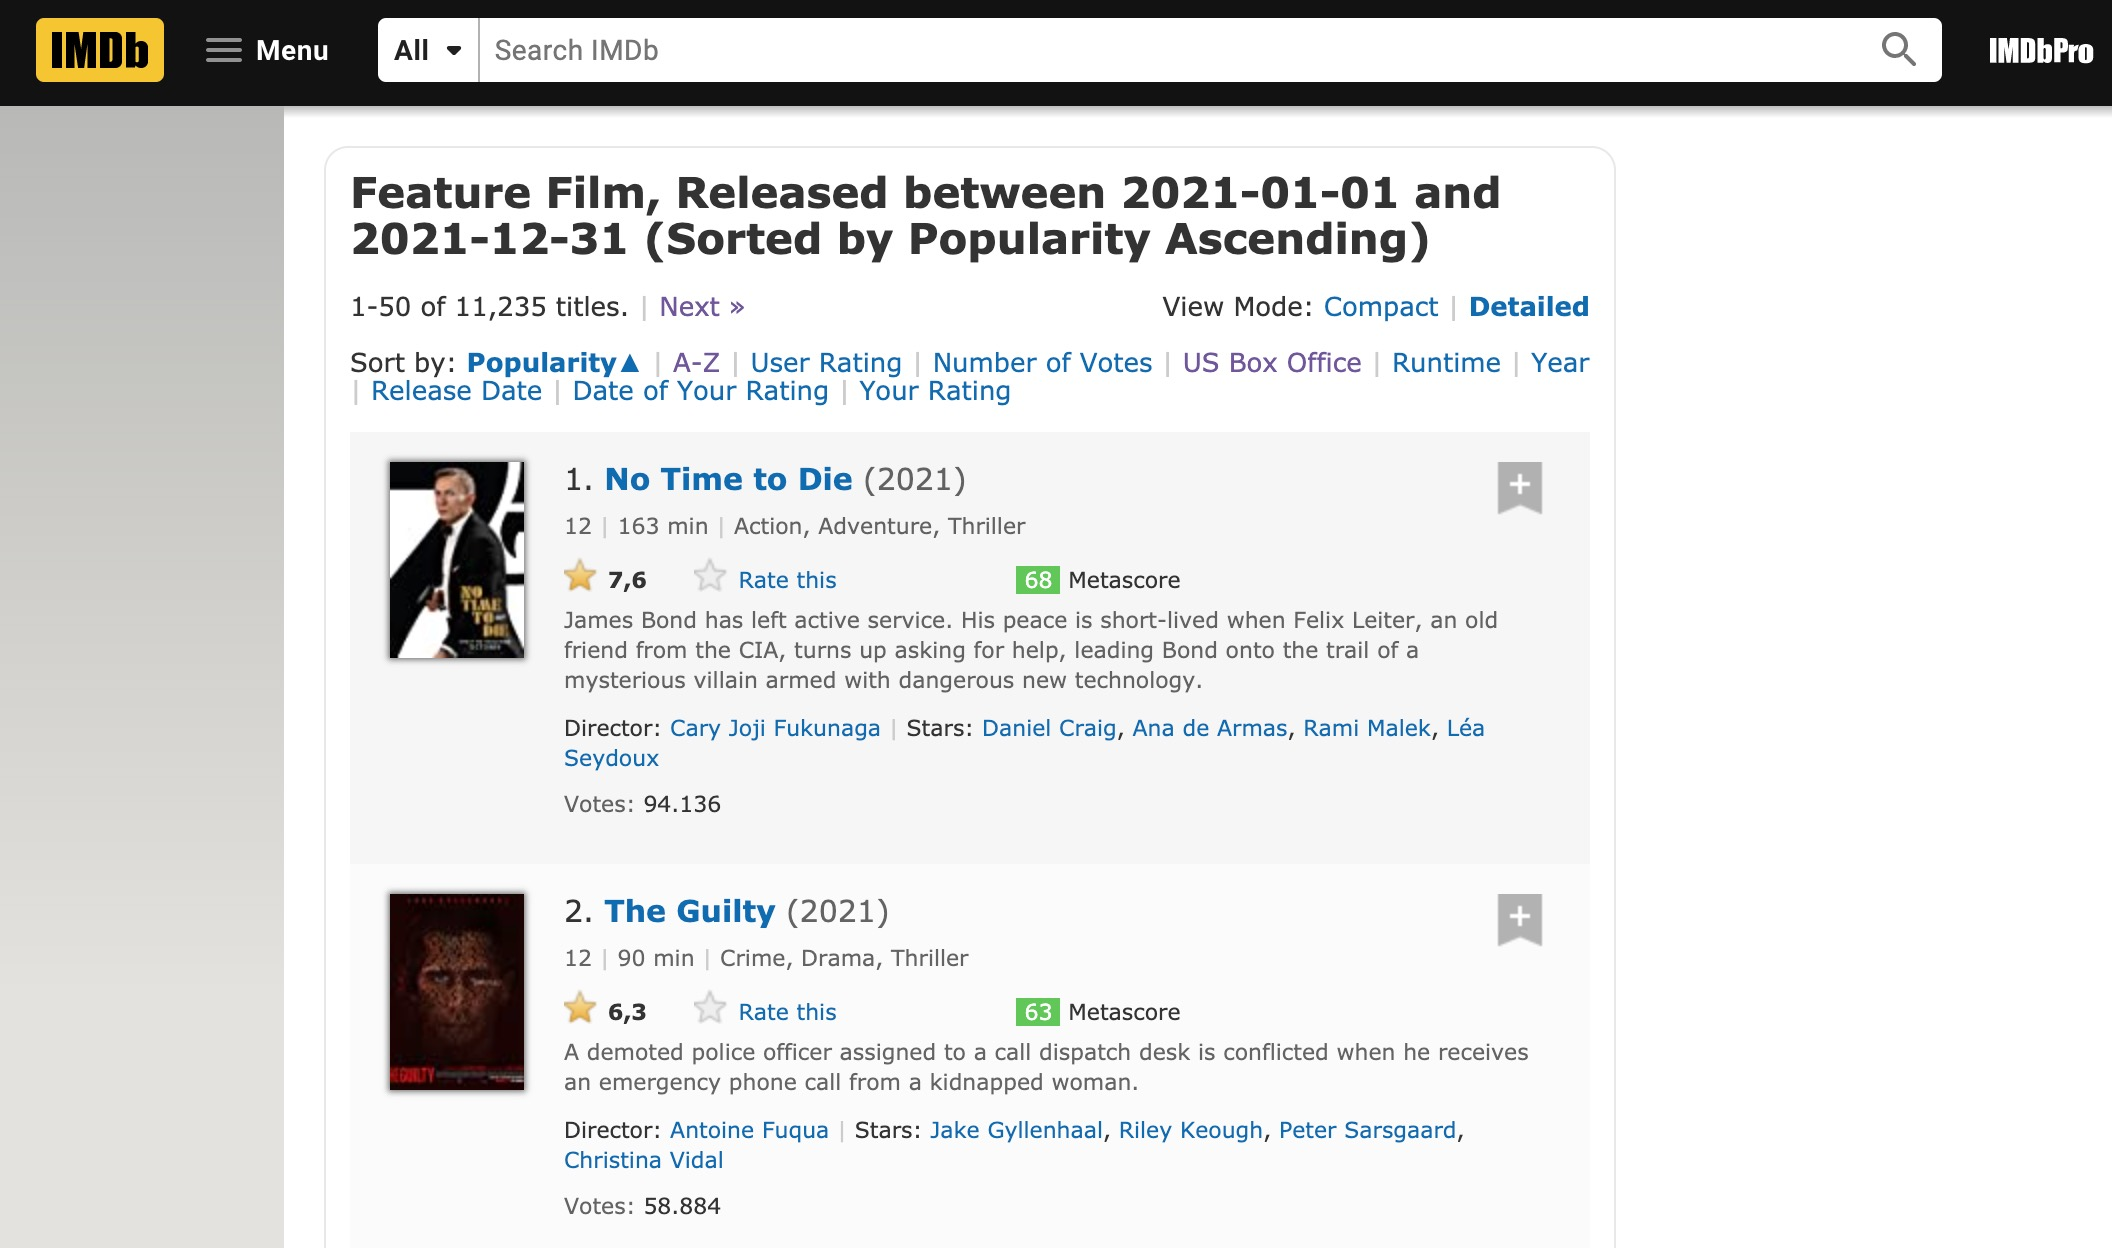

We must create a list containing multiple URL's to navigate through pages of the years of interest. Therefore we must first create a counter to add the year to the base-url. Then we create another counter to navigate through multiple pages for each year. 

In [1]:
#Create base URL
base_url = "https://www.imdb.com/search/title/?title_type=feature&year="

#Create empty lists to store the URL's 
all_year_URL =[]
all_full_URL = []

#Create a counter for all years
counter = 2015
while counter < 2022:
    counter = counter+1
for counter in range(2015, 2022):
    year_url = base_url + str(counter) + "-01-01," + str(counter) + "-12-31&start="
    all_year_URL.append(year_url)

#Create a counter for all pages
for year_url in all_year_URL:
  for number in range(1,1500,50):
    full_URL = (year_url + str(number) + "&ref_=adv_nxt")
    all_full_URL.append(full_URL)

Now, we will parse through data from each of the previously obtained URL's. We will do so using the BeautifulSoup package. We will extract the relevant data from the soup. To do so, we will first select the div-tag. Next, we will find all Movie titles and ratings (if available)

In [ ]:
#Import packages
from bs4 import BeautifulSoup as BS
import requests
from requests import get
import time

#Log data extraction IMDb
logging.basicConfig(filename = 'myapp.log.rtf', format='%(asctime)s %(message)s')
logging.warning('log data extraction IMDb')

#Define function
def extract_data(all_full_URL):
  outputdic=[]
#Create a for-loop and parse through the URL's in the page_urls list
  for full_URL in all_full_URL:
    res=requests.get(full_URL)
    soup= BS(res.text, 'html.parser')
    movie_div=soup.find_all('div', class_='lister-item mode-advanced')
#Find Movie titles and rating
    for container in movie_div:
      name = container.h3.a.text
      try:
        Rating =(container.strong.text)
      except:
        Rating = 'NA'
      outputdic.append({'Movie': name, 'Rating': Rating})
#Use time.sleep function to avoid overloading the server with requests 
    time.sleep(2)
  return(outputdic)

We will use the extracted data to create a dataframe.

In [ ]:
#Import packages
import pandas as pd

#Create Dataframe
IMDB_Movies = pd.DataFrame.from_dict(extract_data(all_full_URL))
print(IMDB_Movies)

Lastly, we use google drive to export the dataframe as a CSV-file

In [ ]:
from google.colab import drive
drive.mount('drive')

In [ ]:
IMDB_Movies.to_csv('IMDB.csv', index=False)
!cp IMDB.csv "drive/My Drive/"